In [11]:
import pandas as pd

# Load the CSV files
slearner_data = pd.read_csv('../results/s_predictions.csv')
tlearner_data = pd.read_csv('../results/t_predictions.csv')
xlearner_data = pd.read_csv('../results/x_predictions.csv')
rlearner_data = pd.read_csv('../results/r_predictions.csv')


In [12]:
# Add a learner identifier column
slearner_data['Learner'] = 'S-Learner'
tlearner_data['Learner'] = 'T-Learner'
rlearner_data['Learner'] = 'R-Learner'
xlearner_data['Learner'] = 'X-Learner'

In [13]:
# Combine all data into one DataFrame
combined_data = pd.concat([slearner_data, tlearner_data, rlearner_data, xlearner_data], ignore_index=True)
combined_data.head()


,schoolid,GrowthMindsetIntervention,StudentAchievementScore,FutureSuccessExpectations,StudentRaceEthnicity,StudentGender,FirstGenCollegeStatus,SchoolUrbanicity,PreInterventionFixedMindset,SchoolAchievementLevel,SchoolMinorityComposition,PovertyConcentration,TotalStudentPopulation,CATE,Learner
0,76,1,0.081602,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.556658,S-Learner
1,76,1,-0.385869,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,-0.111238,S-Learner
2,76,1,0.398184,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.007657,S-Learner
3,76,1,-0.175037,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.007657,S-Learner
4,76,1,0.884583,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757,0.234328,S-Learner


In [14]:
# List of features to calculate CATE for

features = [
    'schoolid', 'GrowthMindsetIntervention', 'FutureSuccessExpectations',
    'StudentRaceEthnicity', 'StudentGender', 'FirstGenCollegeStatus', 'SchoolUrbanicity',
    'PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition',
    'PovertyConcentration', 'TotalStudentPopulation'
]
# Initialize a dictionary to hold CATE results
cate_results = {}
# Initialize a dictionary to hold actual prediction results

In [15]:
# Function to calculate CATE for a given feature
def calculate_cate(feature):
    grouped_data = combined_data.groupby(['Learner', feature]).agg({'CATE': 'mean'}).reset_index()
    grouped_data.columns = ['Learner', feature, 'CATE']
    return grouped_data

In [16]:
# Calculate CATE for each feature and store the results
for feature in features:
    cate_results[feature] = calculate_cate(feature)
  # Assuming the aggregation provides one row per feature

In [17]:
# Display a sample of the CATE results for one feature
cate_results['StudentGender'].head()

actual_scores = {feature: combined_data.groupby(feature)['StudentAchievementScore'].mean() for feature in features}
print(type(actual_scores[feature]))

<class 'pandas.core.series.Series'>


In [18]:
# Create a matrix to compare CATE predictions for all features and learners
comparison_matrix = pd.DataFrame(index=features, columns=['S-Learner', 'T-Learner', 'R-Learner', 'X-Learner','StudentAchievementScore'])



In [19]:
# Fill the matrix with the average CATE values
for feature in features:
    for learner in ['S-Learner', 'T-Learner', 'R-Learner', 'X-Learner']:
        learner_data = cate_results[feature]
        mean_cate = learner_data[learner_data['Learner'] == learner]['CATE'].mean()
        comparison_matrix.loc[feature, learner] = mean_cate
    # Get the average actual prediction for the feature
    comparison_matrix.loc[feature, 'StudentAchievementScore'] = actual_scores[feature].iloc[0]

# Display the comparison matrix
comparison_matrix


,S-Learner,T-Learner,R-Learner,X-Learner,StudentAchievementScore
schoolid,0.239509,0.241038,-3.281654,0.241038,-0.385795
GrowthMindsetIntervention,0.254728,0.254684,-3.993812,0.254684,-0.195639
FutureSuccessExpectations,0.233708,0.235222,-3.209229,0.235222,-0.525624
StudentRaceEthnicity,0.259011,0.260301,-3.357285,0.260301,-0.062681
StudentGender,0.253108,0.25289,-3.895235,0.25289,0.003672
FirstGenCollegeStatus,0.256059,0.255369,-3.946352,0.255369,0.012984
SchoolUrbanicity,0.247483,0.248093,-3.810773,0.248093,0.027419
PreInterventionFixedMindset,0.239509,0.241038,-3.281654,0.241038,0.506298
SchoolAchievementLevel,0.239509,0.241038,-3.281654,0.241038,-0.080293
SchoolMinorityComposition,0.239509,0.241038,-3.281654,0.241038,-0.341006


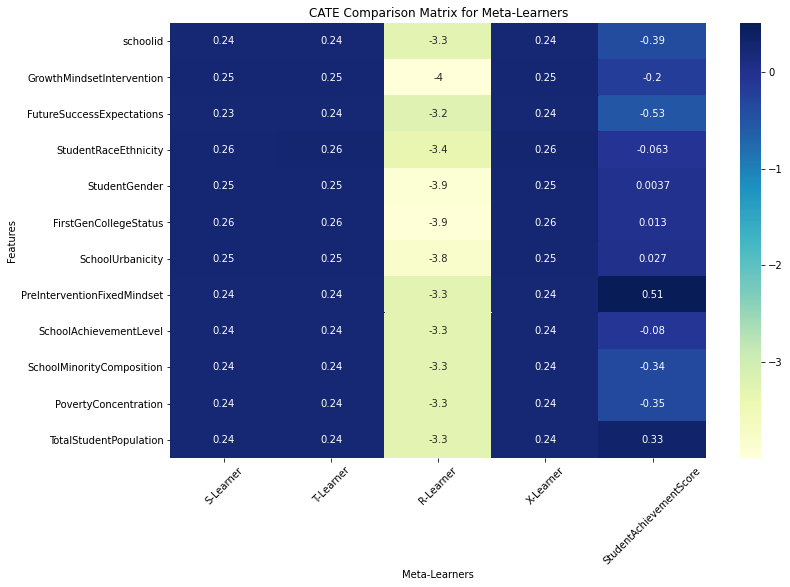

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the comparison matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(comparison_matrix.astype(float), annot=True, cmap="YlGnBu", cbar=True)
plt.title('CATE Comparison Matrix for Meta-Learners')
plt.xlabel('Meta-Learners')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()






